### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
# Reading into the data
movies_df = pd.read_csv("data/movies.csv") 
ratings_df = pd.read_csv("data/ratings.csv") 
links_df = pd.read_csv("data/links.csv") 
tags_df = pd.read_csv("data/tags.csv")

In [3]:
print("---Initial Data Preview---")
print(f"The movies are:\n{movies_df}")
print(f"The ratings are:\n{ratings_df}")
print(f"The links are:\n{links_df}")
print(f"The tags are:\n{tags_df}")

---Initial Data Preview---
The movies are:
      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                           

- Movies_df has 9,742 movies with 3 columns of Movie IDs, titles, and genres.
- Ratings_df has 100,836 ratings with 4 columns of User IDs, movie IDs, ratings (0.5–5.0), and timestamps.
- links_df has 9,742 links which Maps movie IDs to imdbId and tmdbId for external database links.
- Tags_df has 3,683 tags---> User-generated tags (text) for movies.

### Merging the Dataframes

In [4]:
# merging movies and ratings
df = pd.merge(movies_df, ratings_df, on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [5]:
# checking on dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


The merged DataFrame, df, contains 100,836 entries (rows) and 6 columns.

- No missing values: All columns (movieId, title, genres, userId, rating, timestamp) have 100,836 non-null entries, indicating no missing data after the merge.
- Data Types:
    - movieId, userId, timestamp are integers (int64).
    - rating is a floating-point number (float64).
    - title and genres are strings/objects (object).
- Memory Usage: The DataFrame consumes approximately 5.4 MB of memory.

In [6]:
# checking on dataframe description
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


- movieId: Ranges from 1 to 193609, indicating a wide range of unique movies.
- userId: Ranges from 1 to 610, showing there are 610 distinct users in the dataset.
- rating: Ratings are on a scale of 0.5 to 5.0, with an average rating of approximately 3.5. The standard deviation of about 1.04 depictss a decent spread in ratings.

# Exploratory Data Analysis ---> EDA

### 1. Ratings Distribution

In [7]:
# checking how ratings are distributed in the dataframe
df['rating'].value_counts().sort_index()

0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: rating, dtype: int64

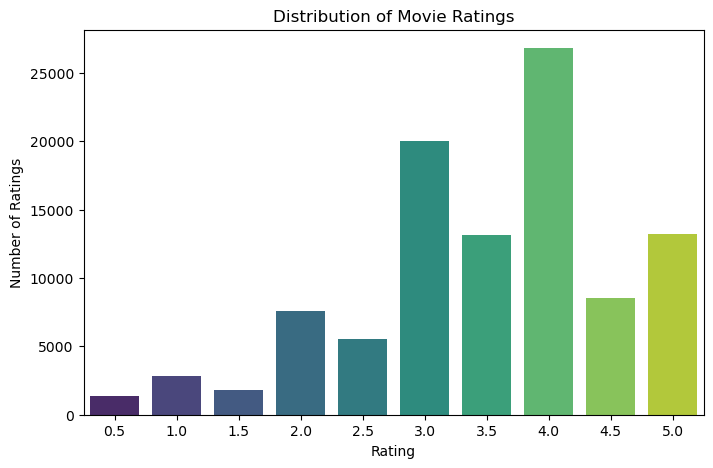

In [8]:
# Visualizing the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

#### Interpretation
The majority of ratings are 4.0 (most frequent), followed by 3.0 and 5.0, showing a strong preference for positive reviews. Ratings of 0.5 and 1.5 are the least common, indicating that users less frequently give very low or half-star ratings. This confirms a general positive bias in user ratings within the dataset.

### 2. Number of Ratings per Movie

In [9]:
# The Top 10 movies by number of ratings in descending order
movie_rating_counts = df.groupby('title')['rating'].count().sort_values(ascending=False)
movie_rating_counts.head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

Forrest Gump (1994), The Shawshank Redemption (1994), and Pulp Fiction (1994) are the most frequently rated movies in this dataset, indicating they are widely seen and popular among users. Lets now visualize in an histogram

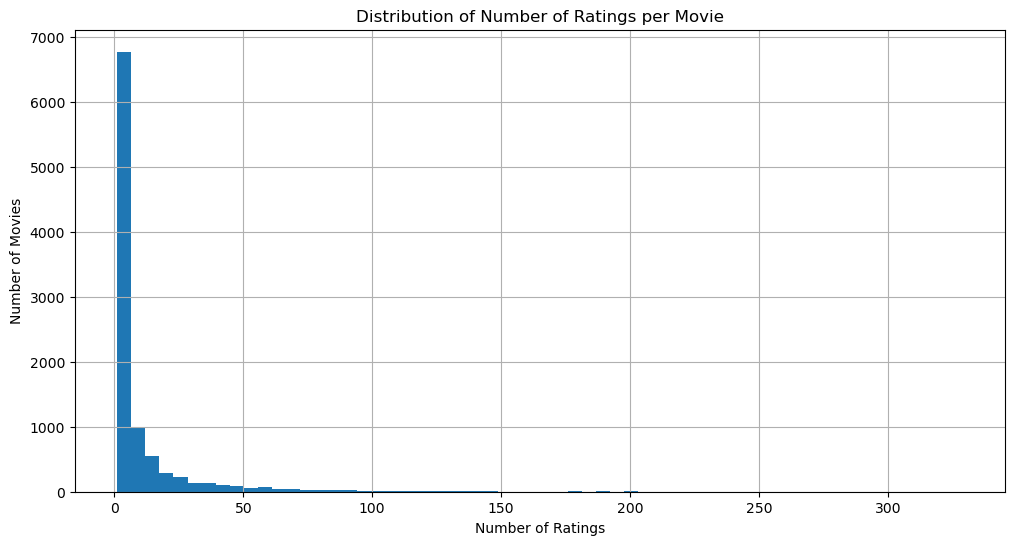

In [10]:
# Visualizing the distribution using histogram
plt.figure(figsize=(12, 6))
movie_rating_counts.hist(bins=60)
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

#### Interpretation
The histogram of the number of ratings per movie follows a normal distribution, though typically,distributions are right-skewed with a long tail of less-rated movies.

### 3. Average Rating per Movie

In [11]:
# The Top 10 movies by average rating, those with atleast 50 ratings
movie_avg_ratings = df.groupby('title')['rating'].mean()

# combining average rating with number of ratings
ratings_summary = pd.DataFrame({'average_rating': movie_avg_ratings, 'num_ratings': movie_rating_counts})

# Filtering out movies with few ratings to avoid misleading high averages from single high rating
min_ratings_threshold = 50 # A good threshold we considered for reliable average
reliable_movies = ratings_summary[ratings_summary['num_ratings'] >= min_ratings_threshold]

# Top 10 reliable movies sorted by average rating in descending order
reliable_movies.sort_values(by='average_rating', ascending=False).head(10)

,average_rating,num_ratings
title,,
"Shawshank Redemption, The (1994)",4.429022,317
"Godfather, The (1972)",4.289062,192
Fight Club (1999),4.272936,218
Cool Hand Luke (1967),4.271930,57
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041,97
Rear Window (1954),4.261905,84
"Godfather: Part II, The (1974)",4.259690,129
"Departed, The (2006)",4.252336,107
Goodfellas (1990),4.250000,126


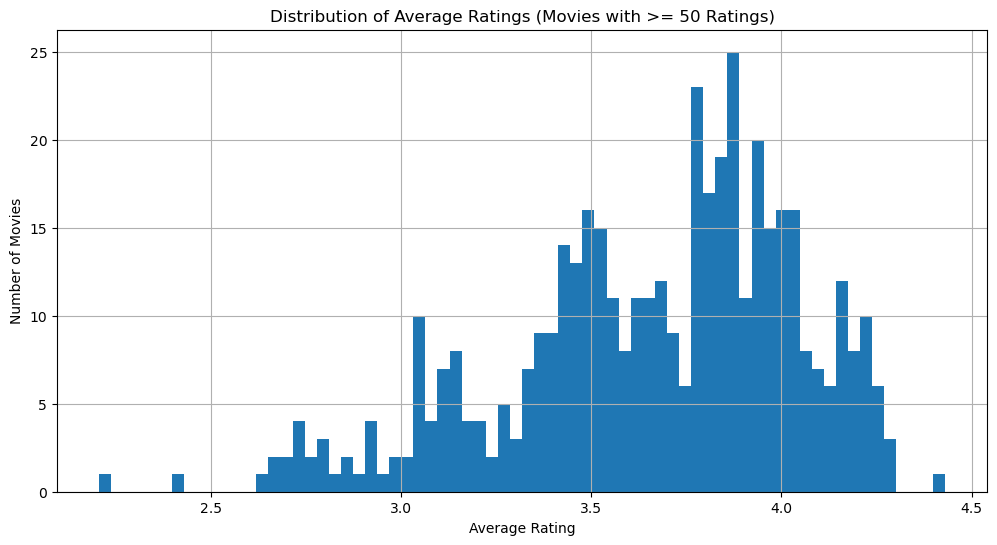

In [12]:
# Visualizing the distribution Average Rating with Number of Movies in an histogram
plt.figure(figsize=(12, 6))
reliable_movies['average_rating'].hist(bins=70)
plt.title('Distribution of Average Ratings (Movies with >= {} Ratings)'.format(min_ratings_threshold))
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()

The distribution of average ratings vs number of movies follows a nearly-normal distribution despite outliers to the right and to the left. There is more concentration between the ratings of 3.4 and 4.0 depicting that most well-rated movies cluster around this region. 

The tail points towards lower average ratings with the peak concentrated around higher ratings

<Figure size 1000x800 with 0 Axes>

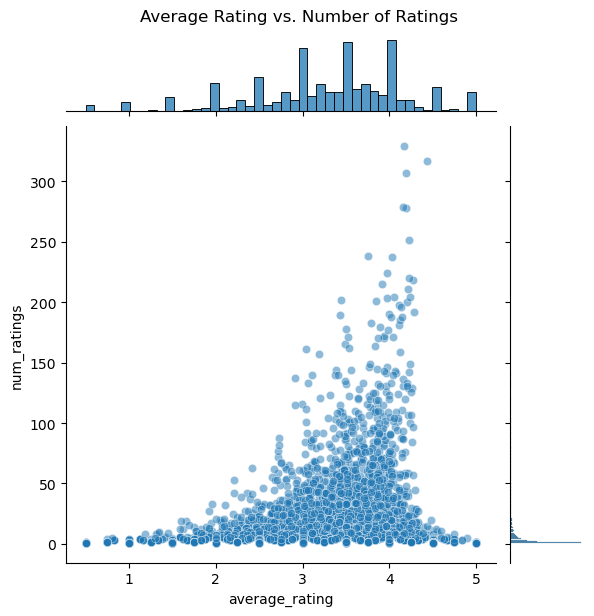

In [13]:
### 4. Joint Plot: Average Rating vs. Number of Ratings
plt.figure(figsize=(10,8))
sns.jointplot(x = 'average_rating', y ='num_ratings', data=ratings_summary, alpha=0.5)
plt.suptitle('Average Rating vs. Number of Ratings', y = 1.02) # Adjusting subtitle position
plt.show()

The joint plot reveals a funnel-like pattern, as the number of ratings increases, the average ratings tend to converge and become more stable, clustering around a central value.

The marginal histograms confirm that most movies have few ratings (a right-skewed distribution), while a smaller subset is extensively rated.

### Data Preparation
#### Creating Pivot Table with the user-item matrix (Movie-User Matrix).
- Rows: userId, Columns: title, Values: rating

In [14]:
# This matrix contains many NaN values
movie_user_matrix = df.pivot_table(index='userId', columns='title', values='rating')

# Displaying the matrix
movie_user_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Creating a transposed matrix (Movie-User Matrix) For User-based CF
user_movie_matrix = df.pivot_table(index='title', columns='userId', values='rating')
# Displaying
user_movie_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Modelling

### Importing necessary libraries

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Splitting the Data

In [17]:
# To be used with Sklearn Models
X = df[['userId', 'movieId']]
y = df['rating']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retaining the original flat_df split for CF evaluation
flat_df = df[['userId', 'movieId', 'rating']]
train_data_cf, test_data_cf = train_test_split(flat_df, test_size=0.2, random_state=42)

# Checking the shapes of splitted data
print(f"\nTraining data shape for sklearn models: {X_train.shape}")
print(f"Test data shape for sklearn models: {X_test.shape}")
print(f"Training data shape for CF models: {train_data_cf.shape}")
print(f"Test data shape for CF models: {test_data_cf.shape}")


Training data shape for sklearn models: (80668, 2)
Test data shape for sklearn models: (20168, 2)
Training data shape for CF models: (80668, 3)
Test data shape for CF models: (20168, 3)


## Model 1: Movie Recommendation Using Linear Regression (Sklearn)

In [18]:
# Creating a pipeline with StandardScaler and LinearRegression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
# fitiing the training sets
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [19]:
# Predicting
y_pred_lr_pipeline = pipeline_lr.predict(X_test)

In [20]:
# Evaluating the model using RMSE and accuracy score
mse_lr_pipeline = mean_squared_error(y_test, y_pred_lr_pipeline)
rmse_lr_pipeline = sqrt(mean_squared_error(y_test, y_pred_lr_pipeline))


# Displaying
print(f"MSE(Mean Squared Error): {mse_lr_pipeline}")
print(f"RMSE(Root Mean Squared Error): {rmse_lr_pipeline}")


MSE(Mean Squared Error): 1.0954283165577072
RMSE(Root Mean Squared Error): 1.0466271143810995


#### Interpretation
A RMSE of approximately 1.05 suggests that our Linear Regression model's prediction are off by 1.05 rating points from the actual ratings. While not perfect, it provides a baseline perfomance for this simplified model.

#### Clipping Predictions to Validate Range for Better Interpretability

In [21]:
y_pred_lr_pipeline_clipped = np.clip(y_pred_lr_pipeline, 0.5, 5.0)
rmse_lr_pipeline_clipped = sqrt(mean_squared_error(y_test, y_pred_lr_pipeline))

# Displaying
print(f"  RMSE (Clipped Predictions 0.5-5.0: {rmse_lr_pipeline_clipped:.4f})")

  RMSE (Clipped Predictions 0.5-5.0: 1.0466)


#### Interpretation
 RMSE remains the same as the unclipped version. This suggests that in our Linear Regression model, the predictions falling outside the 0.5-5.0 range were either very few or very close to the boundaries, so clipping them didn't significantly change the overall error

## Model 2: Movie Recommendation Using K-Neighbors Regressor (Sklearn)

In [22]:
# K-Nearest Neighbors Regressor with Pipeline and GridSearchCV
# Creating a pipeline  for KNN
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

In [23]:
# Defining the parameter grid for GridSearchCV with best n_neighbors
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 10, 15] # Experimenting with different neigbors
}

In [24]:
# Initializing GridSearchCV with cv=5
grid_search_knn = GridSearchCV(pipeline_knn,
                               param_grid_knn,
                               cv=5, # for 5 cross_validation
                               scoring='neg_mean_squared_error',# standard for regression to minimize RMSE
                               n_jobs=1,
                               verbose=1)


In [25]:
# Running GridSearchCV for KNN
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=1, param_grid={'knn__n_neighbors': [3, 5, 7, 10, 15]},
             scoring='neg_mean_squared_error', verbose=1)

In [26]:
# Checking for the best Parameters
print(f"\nBest parameters for KNN:", grid_search_knn.best_params_)
print(f"Best cross_validation RMSE for KNN:", sqrt(-grid_search_knn.best_score_))


Best parameters for KNN: {'knn__n_neighbors': 15}
Best cross_validation RMSE for KNN: 0.9767443528007987


- We found that setting n_neighbors to 15 yielded the best performance during cross-validation
- An RMSE of approximately 0.98 is generally lower than the 1.05 RMSE we observed for Linear Regression. This suggests that, through tuning, our KNN model is more accurate at predicting movie ratings than the simple Linear Regression model on this dataset.

In [27]:
# Getting the best KNN model from GridSearchCV
best_knn_model = grid_search_knn.best_estimator_

In [28]:
# Predicting
y_pred_knn_best = best_knn_model.predict(X_test)

# Evaluating the model
mse_knn_best = mean_squared_error(y_test, y_pred_knn_best)
rmse_knn_best = sqrt(mean_squared_error(y_test, y_pred_knn_best))

print(f"MSE (Mean Squared Error): {mse_knn_best}")
print(f"RMSE (Root Mean Squared Error): {rmse_knn_best}")

MSE (Mean Squared Error): 0.9620957843007625
RMSE (Root Mean Squared Error): 0.9808648144880937


The K-Nearest Neighbors (KNN) Regressor, after being tuned with GridSearchCV, shows strong performance on the test set with an RMSE of approximately 0.98. This indicates that, on average, its rating predictions are off by about 0.98 rating points. This result is consistent with its cross-validation performance and demonstrates that the tuned KNN model is more accurate than the previously evaluated Linear Regression model.

#### Clipping predictions to validate rating range (0.5 to 5.0)

In [29]:
y_pred_knn_best_clipped = np.clip(y_pred_knn_best, 0.5, 5.0)
rmse_knn_best_clipped = sqrt(mean_squared_error(y_test, y_pred_knn_best_clipped))

print(f"  RMSE (Clipped Predictions 0.5-5.0): {rmse_knn_best_clipped}")

  RMSE (Clipped Predictions 0.5-5.0): 0.9808648144880937


After applying clipping to ensure all predictions fall between 0.5 and 5.0, the K-Nearest Neighbors (KNN) Regressor still yields an RMSE of approximately 0.9809 remaining consistent.

# Model 3. User - Based Collaborative Filtering (Using Cosine Similarity)

In [30]:
# Targeting user for recommendations
target_user_id = 1 # Pick an existing user ID for demonstration
top_n_similar_users = 10
top_n_movies = 5

print(f"\nGenerating user-based recommendations for user ID: {target_user_id}")

if target_user_id in movie_user_matrix.index:
    # Getting the target user's ratings
    target_user_ratings = movie_user_matrix.loc[target_user_id].dropna()

    # Calculating similarity between target user and all other users
    user_similarity_matrix = cosine_similarity(movie_user_matrix.fillna(0))
    user_similarity_df = pd.DataFrame(user_similarity_matrix,
                                      index=movie_user_matrix.index,
                                      columns=movie_user_matrix.index)

    # Getting similarity scores for the target user, excluding self-similarity
    similar_users = user_similarity_df[target_user_id].sort_values(ascending=False)
    similar_users = similar_users.drop(target_user_id) # Removing self from similar users

    # Selecting top N most similar users
    top_similar_users = similar_users.head(top_n_similar_users)
    print(f"Top {top_n_similar_users} similar users for User {target_user_id}:\n{top_similar_users}")

    # Initializing a dictionary to store movie scores
    movie_scores = {}

    for similar_user_id, similarity_score in top_similar_users.items():
        # Getting movies rated by the similar user
        similar_user_rated_movies = movie_user_matrix.loc[similar_user_id].dropna()

        for movie, rating in similar_user_rated_movies.items():
            # Only consider movies not yet rated by the target user
            if movie not in target_user_ratings.index:
                # Add score based on similar user's rating weighted by similarity
                if movie not in movie_scores:
                    movie_scores[movie] = 0
                movie_scores[movie] += rating * similarity_score

    # Convert scores to a Series and sort
    user_based_recommendations = pd.Series(movie_scores).sort_values(ascending=False)
    print(f"\nUser-based Recommendations for User {target_user_id}:")
    print(user_based_recommendations.head(top_n_movies))
else:
    print(f"Error: User ID {target_user_id} not found in the dataset for User-based CF.")


Generating user-based recommendations for user ID: 1
Top 10 similar users for User 1:
userId
266    0.357408
313    0.351562
368    0.345127
57     0.345034
91     0.334727
469    0.330664
39     0.329782
288    0.329700
452    0.328048
45     0.327922
Name: 1, dtype: float64

User-based Recommendations for User 1:
Terminator 2: Judgment Day (1991)    14.182299
Aliens (1986)                        13.925162
Sixth Sense, The (1999)              13.422015
Hunt for Red October, The (1990)     13.377867
Godfather, The (1972)                13.134550
dtype: float64


#  Evaluation for User-based Collaborative Filtering 

In [33]:
# Reconstructing the user-item matrix from the training data for modeling
train_movie_user_matrix_cf = train_data_cf.pivot_table(index='userId', columns='movieId', values='rating')

print(f"\nMaking predictions for User-based CF on {test_data_cf.shape[0]} test samples")

# Initializing lists for CF predictions and actuals
predictions_cf = []
actual_ratings_cf = []
processed_count_cf = 0
total_test_rows_cf = test_data_cf.shape[0]

# Looping through each row in the test data for CF prediction
for index, row in test_data_cf.iterrows():
    user = int(row['userId'])
    movie = int(row['movieId'])
    actual_rating = row['rating']

    predicted_val = np.nan # Default to NaN if prediction isn't made

    # Check if user or movie exists in the training data's CF matrix
    if user in train_movie_user_matrix_cf.index and movie in train_movie_user_matrix_cf.columns:
        # Get users who rated the target movie in the training set
        users_who_rated_movie = train_movie_user_matrix_cf[movie].dropna().index

        if len(users_who_rated_movie) > 0:
            # Create a sub-matrix for similarity calculation including the target user and users who rated the movie
            relevant_users_for_similarity = users_who_rated_movie.union({user})
            if len(relevant_users_for_similarity) >= 2: # Need at least 2 for similarity
                relevant_users_matrix = train_movie_user_matrix_cf.loc[relevant_users_for_similarity].fillna(0)

                user_similarity_matrix_pred = cosine_similarity(relevant_users_matrix)
                user_similarity_df_pred = pd.DataFrame(user_similarity_matrix_pred,
                                                       index=relevant_users_matrix.index,
                                                       columns=relevant_users_matrix.index)

                # Get similarity scores for the target user, excluding self
                similarities = user_similarity_df_pred[user].drop(user, errors='ignore')

                # Filter to only users who rated the target movie and are among the top similar
                similar_users_for_movie = similarities[similarities > 0].sort_values(ascending=False).head(10) # Using top_n_similar_users as 10 here for consistency

                weighted_sum = 0
                sum_of_similarities = 0

                for sim_user_id, sim_score in similar_users_for_movie.items():
                    sim_user_rating = train_movie_user_matrix_cf.loc[sim_user_id, movie]
                    if not pd.isna(sim_user_rating):
                        weighted_sum += sim_user_rating * sim_score
                        sum_of_similarities += sim_score

                if sum_of_similarities > 0:
                    predicted_val = weighted_sum / sum_of_similarities
                    # Ensure predicted rating is within 0.5-5.0 range
                    predicted_val = max(0.5, min(5.0, predicted_val))

    if not pd.isna(predicted_val):
        predictions_cf.append(predicted_val)
        actual_ratings_cf.append(actual_rating)

    processed_count_cf += 1
    if processed_count_cf % 1000 == 0:
        print(f"Processed {processed_count_cf}/{total_test_rows_cf} CF test samples")


if len(predictions_cf) > 0:
    rmse_cf = sqrt(mean_squared_error(actual_ratings_cf, predictions_cf))
    print(f"\nEvaluation Metrics (User-based CF):")
    print(f"  RMSE (Root Mean Squared Error): {rmse_cf}")
else:
    print("\nNo valid predictions could be made for User-based CF evaluation. This might happen if test users/movies are not in training data or not enough similar users exist.")



Making predictions for User-based CF on 20168 test samples
Processed 1000/20168 CF test samples
Processed 2000/20168 CF test samples
Processed 3000/20168 CF test samples
Processed 4000/20168 CF test samples
Processed 5000/20168 CF test samples
Processed 6000/20168 CF test samples
Processed 7000/20168 CF test samples
Processed 8000/20168 CF test samples
Processed 9000/20168 CF test samples
Processed 10000/20168 CF test samples
Processed 11000/20168 CF test samples
Processed 12000/20168 CF test samples
Processed 13000/20168 CF test samples
Processed 14000/20168 CF test samples
Processed 15000/20168 CF test samples
Processed 16000/20168 CF test samples
Processed 17000/20168 CF test samples
Processed 18000/20168 CF test samples
Processed 19000/20168 CF test samples
Processed 20000/20168 CF test samples

Evaluation Metrics (User-based CF):
  RMSE (Root Mean Squared Error): 0.968960262797571


An RMSE of approximately 0.97 indicates that, on average, the User-Based CF model's predicted movie ratings deviate from the actual user ratings by about 0.97 rating points. This is a good performance, suggesting the model is reasonably accurate in its predictions.It is better than the previous two models of KNN and Linear Regression.

#### Key Findings (RMSE):
- User-based Collaborative Filtering: Achieved an RMSE of approximately 0.9690.
- K-Nearest Neighbors Regressor (Tuned): Demonstrated strong performance with an RMSE of approximately 0.9809 (clipped).
- Linear Regression: Served as a baseline with an RMSE of approximately 1.0466 (clipped).
The lower RMSE values indicate better predictive accuracy, with User-based CF and tuned KNN generally outperforming simple Linear Regression for this dataset.